# <center> Linear Regression</center>

### Important Librararies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,:1]
y = data[:,1]

### Scattering training dataset

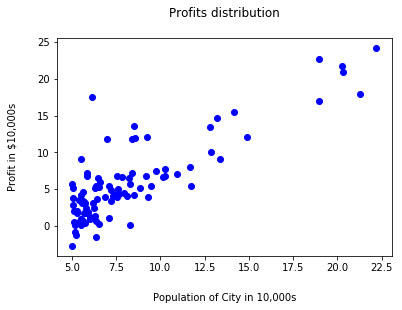

In [3]:
plt.scatter(X, y, marker='o', c='b')
plt.title('Profits distribution',y =1.07)
plt.xlabel('Population of City in 10,000s',labelpad = 20)
plt.ylabel('Profit in $10,000s',labelpad = 20)
plt.show()

In [4]:
# Reshape training data(it's because single feature)
X = np.array(X)
X = X.reshape(-1,1)
y = np.array(y)
y = y.reshape(-1,1)  

In [15]:
#number of training samples
m = y.size
print('number of training samples:',m)

#Add a column of ones to X (interception data (bias))
X = np.c_[np.ones(m), X]

#Initialize theta parameters
theta = np.zeros(shape=(2, 1))

#Some gradient descent settings
num_iters = 5000
alpha = 0.02

number of training samples: 97


### Loss (mean_squared_error)

In [6]:
def compute_cost(X, y, theta):
    
    #Number of training samples
    m = y.size
    
    #Hypothesis
    h = np.dot(X,theta)
    
    #Square difference
    sqErrors = np.square(h - y)
    
    #Error cost
    J =sqErrors.sum()/(2 * m)
    return J

### Optimizer (Batch Gradient Descent)

In [7]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    
    #Initialize J_hisotry
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
      
        #Hypothesis
        h = X.dot(theta)
        
        #Updating theta
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        
        #Computing cost for every theta
        J_history[iter] = compute_cost(X, y, theta)
        
    return(theta, J_history)

In [8]:
#Testing cost function with theta [0;0]
J = compute_cost(X, y, theta)
print('cost with theta[0;0]:',J)

#Testing cost function with theta [-1;2]
J = compute_cost(X, y,[[-1],[2]])
print('cost with theta[-1;2]:',J)

cost with theta[0;0]: 32.072733877455676
cost with theta[-1;2]: 54.24245508201238


In [9]:
#Theta found by gradientDescent
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
print(theta)

[[-3.89578082]
 [ 1.19303364]]


Here theta computed by Gradient Descent and Normal Equation is same.

In [10]:
#Theta by Normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[-3.89578088]
 [ 1.19303364]]


In [11]:
#For population = 35,000s, we predict a profit of 2798.36876352
print(np.array([1, 3.5]).dot(theta)*10000)

#For population = 70,000s, we predict a profit of 44554.54631015       
print(np.array([1, 7]).dot(theta) * 10000)

[2798.36876352]
[44554.54631015]


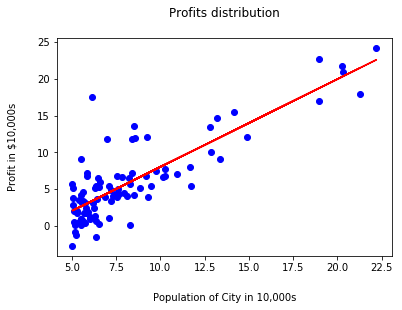

In [12]:
#Plot the results
result = np.dot(X,theta).flatten()
plt.scatter(data[:,:1], data[:,1], marker='o', c='b')
plt.plot(data[:,:1], result, c = 'r')
plt.title('Profits distribution',y =1.07)
plt.xlabel('Population of City in 10,000s',labelpad=20)
plt.ylabel('Profit in $10,000s',labelpad=20)
plt.show()

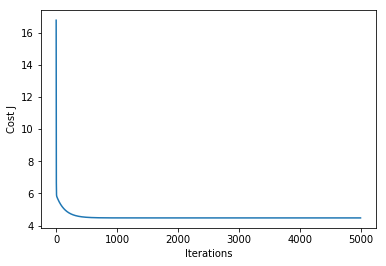

In [17]:
# Convergence of gradient descent with an appropriate learning rate
plt.plot(J_history[0:5000])
plt.ylabel('Cost J')
plt.xlabel('Iterations');

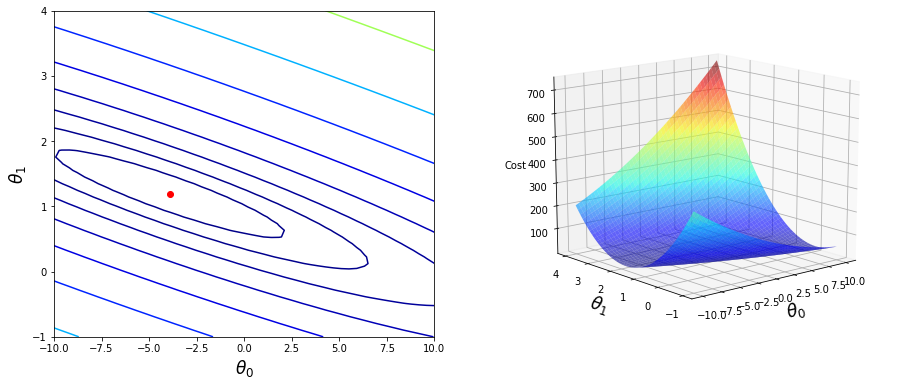

In [14]:
from mpl_toolkits.mplot3d import axes3d
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = compute_cost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)
# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)